In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('combined_data_1.txt', header=None, names=['cust_id', 'rating'], usecols=[0,1])

In [3]:
df.head()

,cust_id,rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [4]:
df.dtypes

cust_id     object
rating     float64
dtype: object

In [5]:
p = df.groupby('rating')['rating'].agg(['count'])

In [6]:
p

,count
rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [7]:
movie_count = df.isnull().sum()[1]

In [8]:
movie_count

4499

In [9]:
customer_count = df['cust_id'].nunique() - movie_count

In [10]:
customer_count

470758

In [11]:
rating_count = df['cust_id'].count() - movie_count

In [12]:
rating_count

24053764

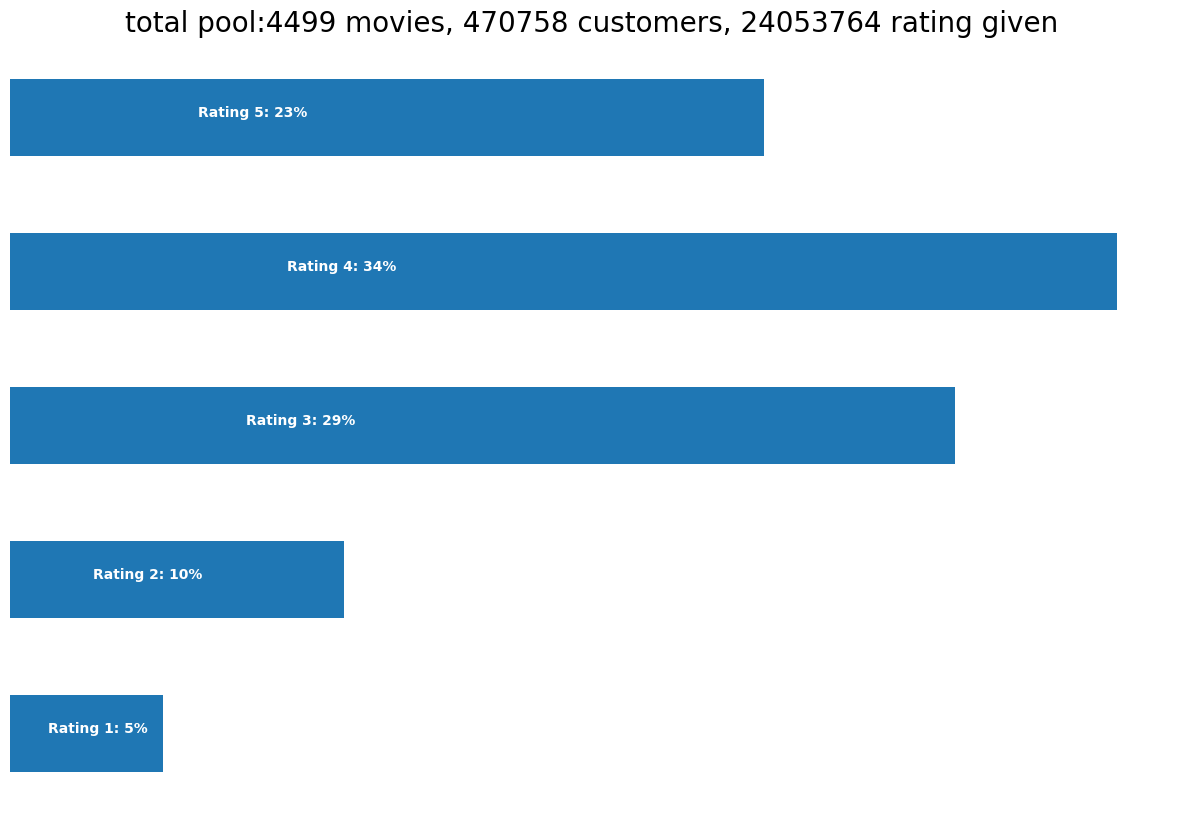

In [13]:
# visualizations
ax = p.plot(kind='barh', legend= False, figsize=(15,10))
plt.title(f"total pool:{movie_count} movies, {customer_count} customers, {rating_count} rating given", fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

In [14]:
df_nan = pd.DataFrame(pd.isnull(df['rating']),)

In [15]:
df_nan

,rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [16]:
df_nan.shape

(24058263, 1)

In [17]:
df_nan = df_nan[df_nan['rating'] == True]

In [18]:
df_nan.shape

(4499, 1)

In [19]:
df_nan = df_nan.reset_index()

In [20]:
df_nan.shape

(4499, 2)

In [21]:
movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [22]:
df = df[pd.notnull(df['rating'])]
df['movies_id'] = movie_np.astype(int)
df['cust_id'] = df['cust_id'].astype(int)
print('Dataset Example')
df.head(20)

Dataset Example


,cust_id,rating,movies_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
6,893988,3.0,1
7,124105,4.0,1
8,1248029,3.0,1
9,1842128,4.0,1
10,2238063,3.0,1


In [23]:
f = ['count', 'mean']

In [24]:
df_movies_summary = df.groupby('movies_id')['rating'].agg(f)

In [25]:
df_movies_summary

,count,mean
movies_id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [26]:
df_movies_summary.index = df_movies_summary.index.map(int)
movie_benchmark = round(df_movies_summary['count'].quantile(0.7), 0)
drop_movie_list = df_movies_summary[df_movies_summary['count']<movie_benchmark].index

print('movie minimum times of review : {}'.format(movie_benchmark))

movie minimum times of review : 1799.0


In [27]:
df_cust_summary = df.groupby('cust_id')['rating'].agg(f)
df_cust_summary.index = df_cust_summary.index.map(int)
df_cust_summary

,count,mean
cust_id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [28]:
cust_benchmark = round(df_cust_summary['count'].quantile(0.7), 0)
drop_cust_list = df_cust_summary[df_cust_summary['count']<cust_benchmark].index

In [29]:
print(f"customer minimum times of review: {cust_benchmark}")

customer minimum times of review: 52.0


In [30]:
df = df[~df['movies_id'].isin(drop_movie_list)]
df = df[~df['cust_id'].isin(drop_cust_list)]

df.shape

(17337458, 3)

In [31]:
df.head()

,cust_id,rating,movies_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [32]:
df_p = pd.pivot_table(df, values='rating', index='cust_id', columns='movies_id')
print(df_p.shape)

(143458, 1350)


In [33]:
df_p.head()

movies_id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
cust_id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_title = pd.read_csv('movie_titles (1).csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'], error_bad_lines=False)

df_title.set_index('Movie_Id', inplace = True)

print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


C:\Users\gayatri\AppData\Local\Temp\ipykernel_1472\3906694339.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_title = pd.read_csv('movie_titles (1).csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'], error_bad_lines=False)
Skipping line 72: expected 3 fields, saw 4
Skipping line 264: expected 3 fields, saw 5
Skipping line 350: expected 3 fields, saw 4
Skipping line 366: expected 3 fields, saw 4
Skipping line 394: expected 3 fields, saw 4
Skipping line 466: expected 3 fields, saw 4
Skipping line 582: expected 3 fields, saw 4
Skipping line 600: expected 3 fields, saw 4
Skipping line 670: expected 3 fields, saw 4
Skipping line 672: expected 3 fields, saw 4
Skipping line 729: expected 3 fields, saw 4
Skipping line 776: expected 3 fields, saw 4
Skipping line 827: expected 3 fields, saw 4
Skipping line 834: expected 3 fields, saw 4
Skipping line 891: expected 

In [35]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [36]:
conda install -c conda-forge scikit-surprise

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0





Solving environment: ...working... done

# All requested packages already installed.



In [37]:
import math
import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [38]:
reader = Reader()

In [39]:
data = Dataset.load_from_df(df[['cust_id', 'movies_id', 'rating']][:100000], reader)

In [40]:
svd = SVD()

cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0000  0.9965  0.9946  0.9970  0.0022  
MAE (testset)     0.8055  0.7996  0.7969  0.8007  0.0036  
Fit time          1.87    1.72    1.26    1.61    0.26    
Test time         0.50    0.37    0.36    0.41    0.07    


{'test_rmse': array([1.00000002, 0.99645572, 0.9946062 ]),
 'test_mae': array([0.80545463, 0.79964695, 0.79688985]),
 'fit_time': (1.8686285018920898, 1.7187809944152832, 1.256925344467163),
 'test_time': (0.5030388832092285, 0.36981773376464844, 0.3573477268218994)}

In [41]:
df.head()

,cust_id,rating,movies_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [42]:
## To find all the movies rated as 5 stars by user with userId = 712664
df_712664 = df[(df['cust_id'] == 712664) & (df['rating'] == 5)]
df_712664 = df_712664.set_index('movies_id')
df_712664 = df_712664.join(df_title)['Name']
df_712664.head()

movies_id
3               Character
79            The Killing
175        Reservoir Dogs
199       The Deer Hunter
241    North by Northwest
Name: Name, dtype: object

In [43]:
user_712664 = df_title.copy()
user_712664 = user_712664.reset_index()
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]

data = Dataset.load_from_df(df[['cust_id', 'movies_id', 'rating']], reader)

In [47]:

# Sample a smaller subset of the data
small_data = df.sample(frac=0.1)

# Create a reader object
reader = Reader(rating_scale=(1, 5))

# Load the dataset from the pandas dataframe
small_dataset = Dataset.load_from_df(small_data[['cust_id', 'movies_id', 'rating']], reader)

# Build the full training set
train_set = small_dataset.build_full_trainset()

# Fit the SVD model
from surprise import SVD
svd = SVD()
svd.fit(train_set)

# Predict for user 712664
user_712664 = pd.DataFrame({'Movie_Id': [712664]})  # Replace with actual movie IDs
user_712664['estimate_score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)